In [2]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt

from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

# **Modelo de Black-Scholes / Opción Call Europea**

In [69]:
S0 = 50  # Precio actual del activo
sigma = 0.4  # Volatilidad (20%)
r = 0.05  # Tasa de interés libre de riesgo (5%)
K = 40  # Precio de ejercicio
T = 1  # Tiempo hasta el vencimiento (1 año)
N = 200
dt = T/N

d1 = (math.log(S0 / K) + (r + (sigma ** 2) / 2) * T) / (sigma * math.sqrt(T))
d2 = d1 - sigma * math.sqrt(T)
call_price = S0 * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
call_price

14.488203788416673

# **Método Montecarlo**

In [126]:
S0 = 50  # Precio actual del activo
sigma = 0.4  # Volatilidad (20%)
r = 0.05  # Tasa de interés libre de riesgo (5%)
K = 40  # Precio de ejercicio
T = 1  # Tiempo hasta el vencimiento (1 año)
N = 300
dt = T/N

M = 30000 # Número de trayectorias
sims = 2000 # Número de simulaciones

browniano = np.random.normal(0, 1, M)
f_call = []

for i in range(sims):
    valor_final = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * math.sqrt(T) * browniano)
    opcion = np.maximum(valor_final - K, 0)

    precio_call = np.mean(opcion) * np.exp(-r * T)

    f_call.append(precio_call)

print(np.mean(f_call))

14.461735495135166


# **Árboles Binomiales**


Graficar la convergencia 

In [134]:
S0 = 50  # Precio actual del activo
sigma = 0.4  # Volatilidad (20%)
r = 0.05  # Tasa de interés libre de riesgo (5%)
K = 40  # Precio de ejercicio
T = 1  # Tiempo hasta el vencimiento (1 año)
N = 365
dt = T/N

# Cálculo de u, d y p
u = np.exp(sigma * np.sqrt(dt))
d = np.exp(-sigma * np.sqrt(dt))
p = (np.exp(r * dt) - d) / (u - d)

# Inicialización de la matriz de precios del subyacente y opciones
S_t = np.zeros((N + 1, N + 1))
f_call = np.zeros((N + 1, N + 1))

# Rellenar la matriz de precios del subyacente
for i in range(N + 1):
    for j in range(i + 1):
        S_t[i, j] = S0 * u**j * d**(i - j)

# Condiciones finales de la opción call
f_call[-1, :] = np.maximum(S_t[-1, :]-K, 0)

# Cálculo hacia atrás de la opción call americana
for i in range(N - 1, -1, -1):
    for j in range(i + 1):
        f_call[i, j] = (np.exp(-r * dt)) * ((1 - p) * f_call[i + 1, j] + p * f_call[i + 1, j + 1])

# Valor de la opción en el tiempo t=0
print(f_call[0, 0])


14.488448361408825


In [140]:
((14.488203788416673-14.483774308978006)/14.488203788416673)*100

0.03057300617353224

# **Diferencias finitas**

In [138]:
S0 = 50  # Precio actual del activo
sigma = 0.4  # Volatilidad (20%)
r = 0.05  # Tasa de interés libre de riesgo (5%)
K = 40  # Precio de ejercicio
T = 1  # Tiempo hasta el vencimiento (1 año)
N = 365

S_max = 3*S0  # Máximo valor del eje de precios
ds = 0.4  # Tamaño de los saltos del precio
ns = int(S_max / ds)  # Número de Particiones para el activo

dt = (ds / (sigma * S_max))**2  
nt = int(T / dt)  # Número de Particiones para el tiempo
dt = T / nt  # Tamaño de los saltos del tiempo
S = np.arange(0, S_max + ds, ds)  # Vector de precios

# Matriz de la opción
f_call = np.zeros((nt + 1, ns + 1))
f_call[:, ns] = S_max - K # Frontera derecha
f_call[-1, :] = np.maximum(S - K, 0)  # Frontera Inferior

# Coeficientes
a = np.zeros(ns + 1)
b = np.zeros(ns + 1)
c = np.zeros(ns + 1)

for j in range(ns + 1):
    a[j] = (dt / (1 + r * dt)) * ((-1/2) * r * j + (1/2) * sigma**2 * j**2)
    b[j] = (dt / (1 + r * dt)) * ((1/dt) - sigma**2 * j**2)
    c[j] = (dt / (1 + r * dt)) * ((1/2) * r * j + (1/2) * sigma**2 * j**2)

# Cálculo hacia atrás de la opción call
for i in range(nt - 1, -1, -1):
    for j in range(1, ns):
        f_call[i, j] = a[j] * f_call[i + 1, j - 1] + b[j] * f_call[i + 1, j] + c[j] * f_call[i + 1, j + 1]

f_call[0, int(S0/ds)]

14.486310553257418

In [141]:
((call_price-14.486310553257418)/call_price)*100

0.013067424967947376

Esta representación gráfica es útil para visualizar cómo el valor de una opción call europea evoluciona a lo largo del tiempo y en respuesta a cambios en el precio del activo subyacente

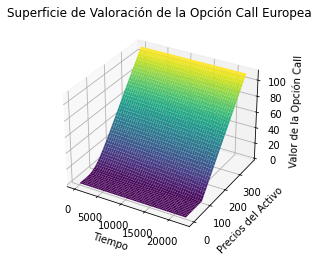

In [147]:
x, y = np.meshgrid(np.arange(0, nt + 1), np.arange(0, ns + 1))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, f_call.T, cmap='viridis');

ax.set_xlabel('Tiempo')
ax.set_ylabel('Precios del Activo')
ax.set_zlabel('Valor de la Opción Call')
plt.title('Superficie de Valoración de la Opción Call Europea')
plt.show()

In [145]:
dt*nt

1.0